In [1]:
pip install spark

     ---------------------------------------- 0.0/41.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/41.0 kB ? eta -:--:--
     ------------------- -------------------- 20.5/41.0 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 41.0/41.0 kB 394.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for spark: filename=spark-0.2.1-py3-none-any.whl size=58759 sha256=8cd296dcd39417971d235568a7868d4f21480aa5e7dda62c465a4405aec8eb32
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\67\c2\7c\a53325365fba358ffff35af84a2e14cf88c18052f88acfa5f0
Successfully built spark
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyspark

     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.0/317.3 MB ? eta -:--:--
     ---------------------------------------- 0.2/317.3 MB 2.6 MB/s eta 0:02:00
     ---------------------------------------- 0.4/317.3 MB 3.5 MB/s eta 0:01:32
     ---------------------------------------- 0.5/317.3 MB 3.5 MB/s eta 0:01:31
     ---------------------------------------- 0.7/317.3 MB 3.6 MB/s eta 0:01:28
     ---------------------------------------- 0.9/317.3 MB 3.6 MB/s eta 0:01:28
     ---------------------------------------- 1.1/317.3 MB 3.6 MB/s eta 0:01:28
     ---------------------------------------- 1.3/317.3 MB 3.7 MB/s eta 0:01:27
     ---------------------------------------- 1.4/317.3 MB 3.6 MB/s eta 0:01:29
     ---------------------------------------- 1.5/317.3 MB 3.5 MB/s eta 0:01:30
     ---------------------------------------- 1.7/317.3 MB 3.5 MB/s eta 0:01:30
     ---------------------------------------- 1.9/317.

In [1]:

#Entrypoint 2.x
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark SQL basic example").getOrCreate()

# On yarn:
# spark = SparkSession.builder.appName("Spark SQL basic example").enableHiveSupport().master("yarn").getOrCreate()
# specify .master("yarn")

sc = spark.sparkContext


In [2]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('DataFrame').getOrCreate()

In [3]:
# Read CSV file
df = spark.read.csv("NYC.csv", header=True, inferSchema=True, sep=',', quote='"', escape='"')


In [5]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

In [6]:
df.show(5,vertical=True)

-RECORD 0-------------------------------------
 Summons Number        | 7032646177           
 Plate ID              | XASP83               
 Registration State    | New Jersey           
 Plate Type            | Passenger Car        
 Issue Date            | 2013-08-08           
 Violation Code        | 85                   
 Vehicle Body Type     | 4DSD                 
 Vehicle Make          | CHEVR                
 Issuing Agency        | TRAFFIC              
 Violation Precinct    | 52                   
 Violation County      | Bronx                
 Street Name           | W Kingsbridge Rd     
 Law Section           | 408                  
 Sub Division          | k5                   
 Vehicle Color         | Others               
 Feet From Curb        | 0                    
 Violation Description | 85-Storage-3 hour... 
 Violation Time        | 2024-08-13 01:00:00  
 Vehicle Size          | Four Wheeler         
-RECORD 1-------------------------------------
 Summons Numb

In [7]:
column_name = "Violation Time"
column_type = df.schema[column_name].dataType
print(f"Data type of '{column_name}': {column_type}")

Data type of 'Violation Time': TimestampType()


In [8]:
from pyspark.sql.functions import col, date_format

In [9]:
df = df.withColumn("Violation Time", date_format(col("Violation Time"), "yyyy-MM-dd HH:mm:ss"))

In [10]:
df.dtypes

[('Summons Number', 'bigint'),
 ('Plate ID', 'string'),
 ('Registration State', 'string'),
 ('Plate Type', 'string'),
 ('Issue Date', 'date'),
 ('Violation Code', 'int'),
 ('Vehicle Body Type', 'string'),
 ('Vehicle Make', 'string'),
 ('Issuing Agency', 'string'),
 ('Violation Precinct', 'int'),
 ('Violation County', 'string'),
 ('Street Name', 'string'),
 ('Law Section', 'string'),
 ('Sub Division', 'string'),
 ('Vehicle Color', 'string'),
 ('Feet From Curb', 'string'),
 ('Violation Description', 'string'),
 ('Violation Time', 'string'),
 ('Vehicle Size', 'string')]

##################### Using Clustering #####################################

In [11]:
from pyspark.sql.functions import col

# Sample 1% of the data
sample_df = df.sample(fraction=0.001, withReplacement=False, seed=42)

# Convert to Pandas DataFrame
pandas_df = sample_df.toPandas()

In [12]:
pandas_df.head (3)

Summons Number Plate ID Registration State          Plate Type  Issue Date  \
0      7594064914  K831942           Illinois       Passenger Car  2013-10-11   
1      7098836990  EKR5149           New York       Passenger Car  2013-10-21   
2      7056132285  75459MC           New York  Commercial Vehicle  2013-10-07   

   Violation Code Vehicle Body Type Vehicle Make Issuing Agency  \
0              20              SUBN        TOYOT        TRAFFIC   
1              21              SUBN         FORD        TRAFFIC   
2              19               VAN        MITSU        TRAFFIC   

   Violation Precinct Violation County          Street Name Law Section  \
0                  30        Manhattan  Fort Washington Ave         408   
1                 112           Queens          Queens Blvd         408   
2                  13        Manhattan       Park Ave South         408   

  Sub Division Vehicle Color Feet From Curb         Violation Description  \
0            d          Blue              0      20A-No Parking (Non-COM)   
1           d1           Red              0  21-No Parking (street clean)   
2           c3         White              0        19-No Stand (bus stop)   

        Violation Time   Vehicle Size  
0  2024-08-13 06:43:00   Four Wheeler  
1  2024-08-13 07:44:00   Four Wheeler  
2  2024-08-13 08:48:00  Heavy Vehicle

In [13]:
pandas_df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Violation Precinct', 'Violation County',
       'Street Name', 'Law Section', 'Sub Division', 'Vehicle Color',
       'Feet From Curb', 'Violation Description', 'Violation Time',
       'Vehicle Size'],
      dtype='object')

In [14]:
pandas_df.shape

(23007, 19)

In [20]:
pandas_df["Violation Precinct"].unique()

array([ 30, 112,  13,  69,  77,   6, 103,  63,  70,  47,  17, 110,   5,
         9, 114, 106,  10,  50, 105,  14,  67,  45, 115,   1,  61,  43,
        19, 104, 102,  84,  28, 107,  40,  23,  25,  90,  26,  76,  18,
        48,  20,  79,  94,  32,  24,  49,  62,  83,  73,  68,   0,  72,
        52,  88,  33, 108, 111,  66,  46, 121,  71, 109,  60,  44, 100,
         7, 120,  78,  34, 113,  42,  75,  81,  41, 101, 122, 123,  22])

In [22]:
pandas_df["Violation County"].unique()

array(['Manhattan', 'Queens', 'Brooklyn', 'Bronx', 'Richmond'],
      dtype=object)

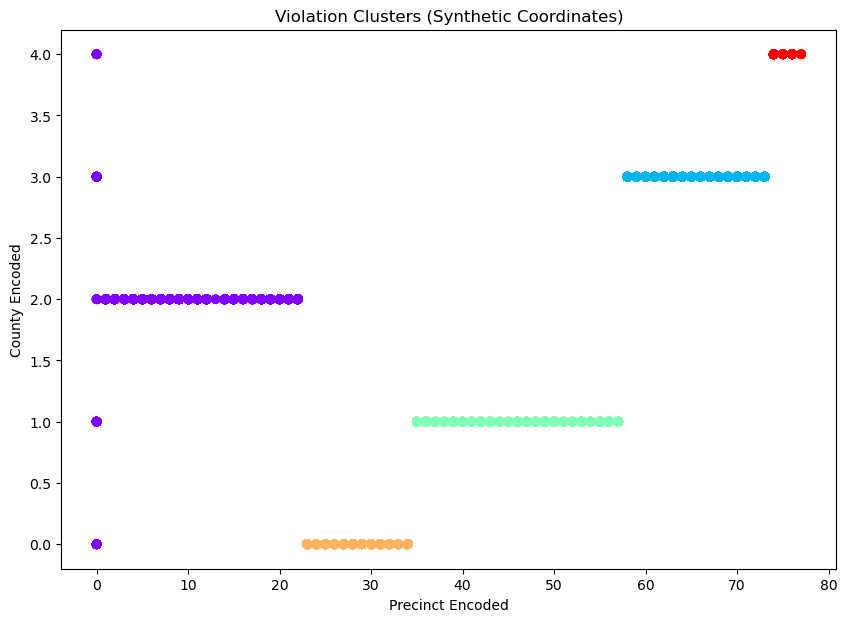

In [15]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Encoding categorical data to synthetic coordinates
precinct_encoder = LabelEncoder()
county_encoder = LabelEncoder()

pandas_df['Precinct Encoded'] = precinct_encoder.fit_transform(pandas_df['Violation Precinct'])
pandas_df['County Encoded'] = county_encoder.fit_transform(pandas_df['Violation County'])

# Assigning synthetic coordinates based on precinct and county encoding
X = pandas_df[['Precinct Encoded', 'County Encoded']]

# Applying DBSCAN
db = DBSCAN(eps=1, min_samples=2).fit(X)
pandas_df['Cluster'] = db.labels_

# Plotting the clusters using synthetic coordinates
plt.figure(figsize=(10, 7))
plt.scatter(pandas_df['Precinct Encoded'], pandas_df['County Encoded'], c=pandas_df['Cluster'], cmap='rainbow', marker='o')
plt.title('Violation Clusters (Synthetic Coordinates)')
plt.xlabel('Precinct Encoded')
plt.ylabel('County Encoded')
plt.show()


In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


# Encoding categorical data to synthetic coordinates
precinct_encoder = LabelEncoder()
county_encoder = LabelEncoder()

pandas_df['Precinct Encoded'] = precinct_encoder.fit_transform(pandas_df['Violation Precinct'])
pandas_df['County Encoded'] = county_encoder.fit_transform(pandas_df['Violation County'])

# Assigning synthetic coordinates based on precinct and county encoding
X = pandas_df[['Precinct Encoded', 'County Encoded']]

# Applying DBSCAN
db = DBSCAN(eps=1, min_samples=2).fit(X)
pandas_df['Cluster'] = db.labels_

# Plotting with Plotly for interactive hover
fig = px.scatter(
    pandas_df,
    x='Precinct Encoded',
    y='County Encoded',
    color='Cluster',
    hover_name='Street Name',
    hover_data={
        'Precinct Encoded': False,
        'County Encoded': False,
        'Cluster': True,
        'Violation Precinct': True,
        'Violation County': True
    },
    title='Violation Clusters (Synthetic Coordinates)',
    labels={'Precinct Encoded': 'Precinct Encoded', 'County Encoded': 'County Encoded'}
)

fig.update_layout(
    xaxis_title='Precinct Encoded',
    yaxis_title='County Encoded'
)

fig.show()
